## 1. E-Commerce Project

   Building Summary 
   Calculate Central/Dispersion measures 
   Mean, STD, …
   Get the distribution of the data (each column)
   Define the distribution based on the plot
   Analyze relationships between features
   Correlation (Heatmap) and Pair plot


In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [11]:
#read the dataset
df= pd.read_csv(r"C:\Users\nibla\Downloads\archive (1)\data-2.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Descriptive Statistics

In [12]:
# Calculate Central/Dispersion measures 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
#Get the distribution of categorical columns

categorical_columns = ['StockCode', 'Description','InvoiceDate','Country']
for column in categorical_columns:
    column_distribution = df[column].value_counts()
    print(f"Distribution of {column}:")
    print(column_distribution)
    print()


Distribution of StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

Distribution of Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

Distribution of InvoiceDate:
InvoiceDate
10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 


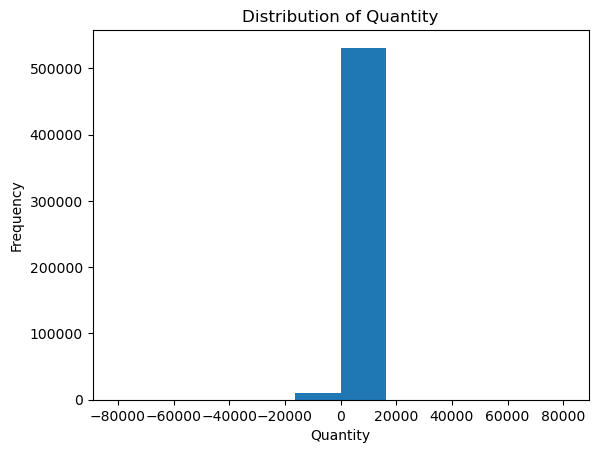

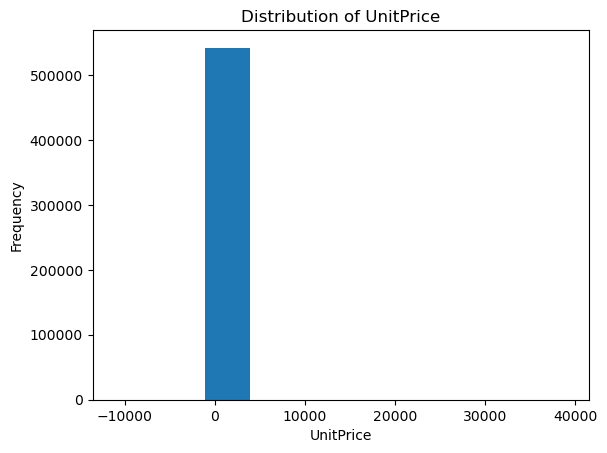

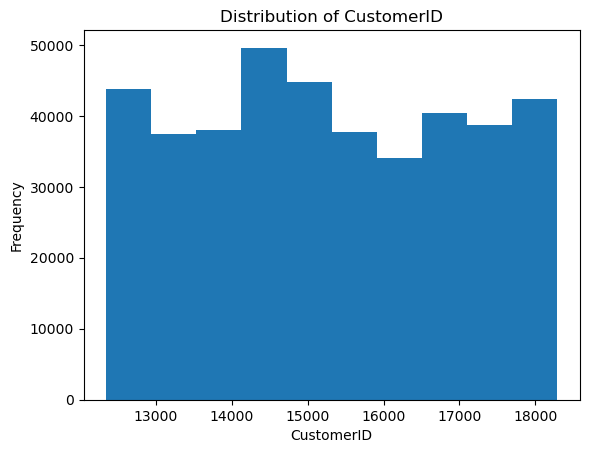

In [17]:
#plots for numerical columns

num_cols = ['Quantity', 'UnitPrice','CustomerID']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=10) 
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [35]:
import matplotlib.pyplot as plt

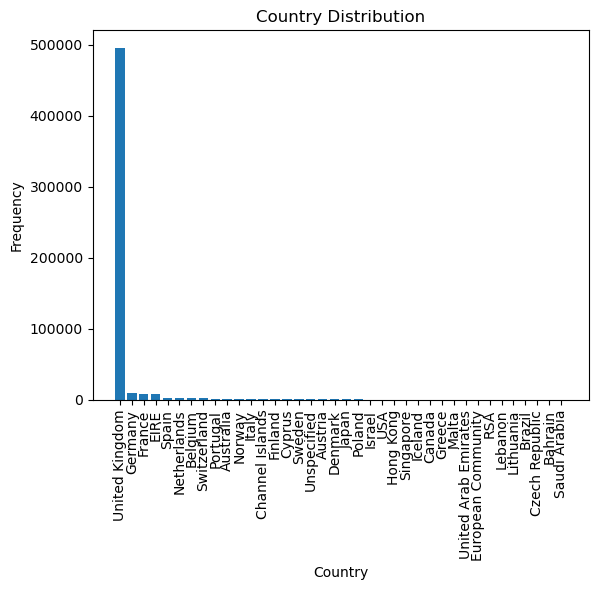

In [22]:

cat_cols = ['Country']

for col in cat_cols:
    col_counts = df[col].value_counts()
    plt.bar(col_counts.index, col_counts.values)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)
    plt.show()
    


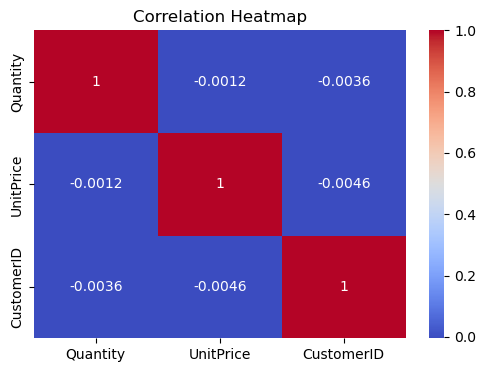

In [25]:
#correlation heatmap between features

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Selecting numerical columns 
numerical_columns = df.select_dtypes(include=[np.number])

#Calculating the correlation matrix
corr_matrix = numerical_columns.corr()

#Generating the heatmap
plt.figure(figsize=(6, 4))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [38]:
#Pair Plot
import seaborn as sns
import pandas as pd

## Exploratory Data Analysis:
Identify the variable and their types 
Clean your data (error, remove duplicates, missing values, Outliers)
Transformation (Standardization, Normalization, encoding categorical to numerical)
Data Visualization (use the suitable visualization that you need)


In [26]:
#identify variables types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [40]:
#converting invoicedate object into a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


## Data Cleaning

In [41]:
#Checking for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
#drop negative values for Quantity column
df = df[df['Quantity']>= 0]
#drop negative values for unit price column
df = df[df['UnitPrice']>=0]
#resetting index
df.reset_index(drop = True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [44]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,531283.000000,531283,531283.000000,397924.000000
mean,10.655299,2011-07-04 18:15:33.177910016,3.898954,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:01:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.830617,NaN,35.876279,1713.169877


In [29]:
#checking for Customer without purchase description
missingVal_indices = [df[df['Description'].isnull()].index.tolist()]
print(missingVal_indices)

[[622, 1970, 1971, 1972, 1987, 1988, 2024, 2025, 2026, 2406, 4347, 4348, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7291, 7292, 7293, 12008, 12069, 12070, 12934, 13219, 13263, 13959, 13960, 13961, 13962, 14060, 14061, 14062, 14063, 14064, 14065, 14066, 14217, 17158, 19599, 19625, 19626, 19627, 19628, 19629, 19630, 19631, 19996, 19999, 20037, 20324, 20330, 20331, 20392, 20393, 20394, 20398, 20399, 20400, 20469, 20470, 20506, 20522, 21349, 21520, 21777, 21778, 21779, 21780, 21781, 21782, 21783, 21784, 21785, 21786, 21787, 21788, 21789, 21790, 21791, 21792, 21793, 22293, 22294, 22295, 22534, 23764, 23765, 23804, 25215, 25216, 29972, 30364, 31226, 34608, 38262, 38539, 38540, 38541, 38542, 39369, 40947, 42289, 42498, 42499, 42500, 42501, 42502, 42503, 42504, 42562, 42563, 42565, 42711, 43704, 44863, 45150, 45394, 45623, 46883, 50151, 50808, 51048, 51672, 51760, 51761, 51762

In [46]:
#Values where Description is missing
MissingVal_Description = df[df['Description'].isna()]
print(MissingVal_Description)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
533712    581103     22689         NaN         4 2011-12-07 11:58:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United K

## Analyzing why Description is missing

In [47]:
#list of countries and Stock code where the description of products is missing
countries_and_stocks_missingDesc = MissingVal_Description[['StockCode','Country']]
unique_countries = countries_and_stocks_missingDesc['Country'].unique()
unique_stocks = countries_and_stocks_missingDesc['StockCode'].unique()
#print Countries and Stocks where items Description are missing
print(f"the following countries {unique_countries} don't add items Description on their Invoices")
print(f"the following stocks{unique_stocks} don't add items Description on their invoices")

the following countries ['United Kingdom'] don't add items Description on their Invoices
the following stocks['22139' '21134' '22145' '37509' '85226A' '85044' '20950' '37461' '84670'
 '84952C' '35951' '21421' '21651' '21777' '85215' '84270' '90167' '22959'
 '37474' '21595' '85170A' '20849' '84977' '21661' '72803B' '35958' '22114'
 '21690' '21488' '84688' '21357' '84497' '90042C' '17091A' '84773'
 '85018C' '20878' '21186' '62095B' '72814' '84802A' '90002D' '22218'
 '84247C' '84534B' '90042B' '20956' '85084' '35004P' '22444' '22591'
 '71477' '35400' '21491' '21009' '22734' '84689' '84675' '22501' '90112'
 '35957' '21667' '82605' '84562A' 'POST' '22323' '21632' '21348' '84823'
 '21324' '84279B' '84452' '37413' '79063D' '20798' '37467' '85049B'
 '22830' '75013B' '22866' '35607A' '17165D' '84795C' '22242' '47591B'
 '79063C' '79062D' '22353' '22833' '35645' '84611B' '84306' '16207B'
 '21429' '85150' '22451' '21655' '85232B' '22837' '16033' '22865' '84029E'
 '15058A' '84459B' '21973' '37468' 

In [ ]:

for stock in unique_stocks:
    df1 = df[(df['StockCode']== stock) & (df['Country']=='United Kingdom')]
    print(df1)

       InvoiceNo StockCode                       Description  Quantity  \
106       536381     22139  RETROSPOT TEA SET CERAMIC 11 PC         23   
622       536414     22139                               NaN        56   
6392      536942     22139                            amazon        15   
6885      536982     22139  RETROSPOT TEA SET CERAMIC 11 PC         10   
14908     537624     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
...          ...       ...                               ...       ...   
538092    581396     22139  RETROSPOT TEA SET CERAMIC 11 PC         24   
538411    581405     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
539531    581439     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
540441    581486     22139  RETROSPOT TEA SET CERAMIC 11 PC          6   
541387    581498     22139  RETROSPOT TEA SET CERAMIC 11 PC          2   

               InvoiceDate  UnitPrice  CustomerID         Country  
106    2010-12-01 09:41:00       4.25     1

`observation:only United Kingdom stocks don't add item description on their invoice

In [31]:
#Values where CustomerId is missing
MissingVal_CustomerID = df[df['CustomerID'].isna()]
print(MissingVal_CustomerID)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kin

In [32]:
#list of countries and Stock code where the description of products is missing
countries_and_stocks_missingCustomerID = MissingVal_CustomerID[['StockCode','Country']]
unique_countries_ = countries_and_stocks_missingCustomerID['Country'].unique()
unique_stocks_ = countries_and_stocks_missingCustomerID['StockCode'].unique()
#print Countries and Stocks where items Description are missing
print(f"the following countries {unique_countries_} don't add CustomerID on their Invoices")
print(f"the following stocks{unique_stocks_} don't add CustomerID on their invoices")

the following countries ['United Kingdom' 'EIRE' 'Bahrain' 'Israel' 'Hong Kong' 'Unspecified'
 'France' 'Switzerland' 'Portugal'] don't add CustomerID on their Invoices
the following stocks['22139' '21773' '21774' ... '23556' '47591b' '84859B'] don't add CustomerID on their invoices


In [33]:
#adding year, month and saled columns 
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['sales'] = df['UnitPrice'] * df['Quantity']  
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  year  month

In [34]:
# quantity of items per country
grouped_Countries_Quantity = df.groupby('Country')['Quantity'].sum()
sorted_Countries_Quantity =grouped_Countries_Quantity.sort_values(ascending=False)
print(sorted_Countries_Quantity)


Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [49]:
#Top 5 Sales per Country
grouped_Countries_sales = df.groupby('Country')['sales'].sum().head(5)
sorted_Countries_sales = grouped_Countries_sales.sort_values(ascending=False)
print(sorted_Countries_sales)


Country
Australia    137077.27
Belgium       40910.96
Austria       10154.32
Brazil         1143.60
Bahrain         548.40
Name: sales, dtype: float64


In [ ]:
#mean sales per country

In [41]:
grouped_Country_Mean_Sales = df.groupby('Country')['sales'].mean()
sorted_country_Mean_Sales = grouped_Country_Mean_Sales.sort_values(ascending=False)
print(sorted_country_Mean_Sales )

Country
Netherlands             120.059696
Australia               108.877895
Japan                    98.716816
Sweden                   79.211926
Denmark                  48.247147
Lithuania                47.458857
Singapore                39.827031
Lebanon                  37.641778
Brazil                   35.737500
Hong Kong                35.128611
Norway                   32.378877
Greece                   32.263836
Finland                  32.124806
EIRE                     32.122599
Bahrain                  28.863158
Switzerland              28.164510
United Arab Emirates     27.974706
Israel                   26.625657
Channel Islands          26.499063
Austria                  25.322494
Canada                   24.280662
Iceland                  23.681319
Czech Republic           23.590667
Germany                  23.348943
France                   23.069288
Spain                    21.624390
European Community       21.176230
Poland                   21.152903
Italy       

In [37]:
#Customer base in each country
df.groupby('Country').nunique()['CustomerID'].sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

## Data Visualization



In [39]:
import matplotlib.pyplot as plt

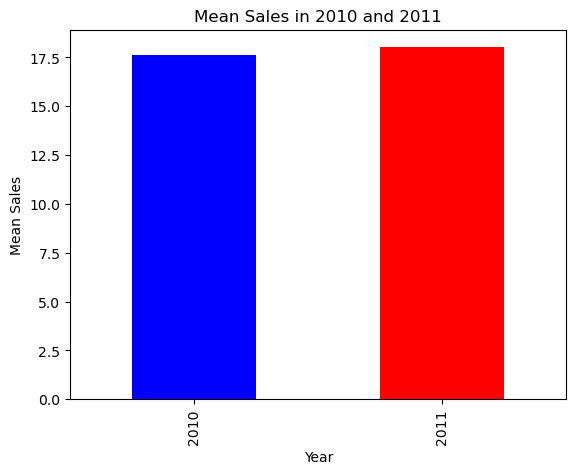

In [45]:

# Assuming your original DataFrame is named 'df' with columns 'sales' and 'year'
mean_sales_df = df.groupby('year')['sales'].mean()
mean_sales_2010 = mean_sales_df.loc[2010]
mean_sales_2011 = mean_sales_df.loc[2011]

# Plotting the mean sales data
mean_sales_df.plot(x='Year', y='Mean Sales', kind='bar', color=['blue', 'red'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.title('Mean Sales in 2010 and 2011')

# Displaying the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

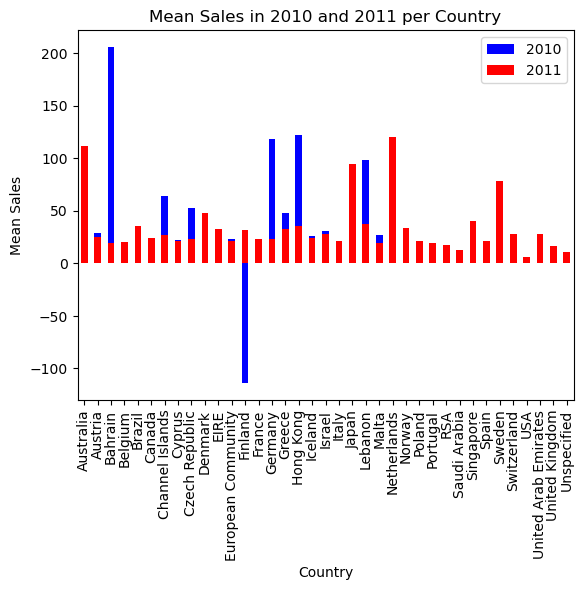

In [46]:

# Assuming your original DataFrame is named 'df' with columns 'sales', 'year', and 'country'
mean_sales_per_country = df.groupby(['year', 'Country'])['sales'].mean()
mean_sales_2010 = mean_sales_per_country.loc[2010]
mean_sales_2011 = mean_sales_per_country.loc[2011]

# Plotting the mean sales data
mean_sales_2010.plot(kind='bar', label='2010', color='blue')
mean_sales_2011.plot(kind='bar', label='2011', color='red')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Mean Sales')
plt.title('Mean Sales in 2010 and 2011 per Country')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


Define your research questions/objectives
Perform Hypothesis testing
Interpret the results findings in the context of your research question or objective. Draw conclusions and make recommendations based on your analysis.
Communicate your results: Present your insights and conclusions in a clear and concise manner, using visualizations and descriptive statistics. Tailor your communication to your audience, whether it be technical or non-technical.


In [ ]:
Research Questions?
H0: there is no significant difference between mean sales in 2010 and sales in 2011
H1: there is a significant difference between mean sales in 2010 and sales in 2011

which statistical test should we perform?
we should perform the t-test, because here we are comparing the difference means between two independent variables; 
sales in 2010 and sales in 2011

In [47]:
import scipy.stats as stats

In [48]:
# Perform t-test
t_statistic, p_value = stats.ttest_ind(mean_sales_2010, mean_sales_2011)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)



T-Statistic: 0.6700326563807818
P-Value: 0.50545107408845


In [ ]:
H0 = 'there is no significant difference between mean sales in 2010 and sales in 2011'
H1 = 'there is a significant difference between mean sales in 2010 and sales in 2011'
aplha = 0.05

In [ ]:
if p_value > alpha: 
    print('we fail to reject the null hypothesis')
else:
    print('we reject the null hypothesis and accept the alternative hypothesis')